## Exploring Rossmann Drug Store Sales Data

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb
%matplotlib inline

data = pd.read_csv('rossmann.csv', skipinitialspace=True, low_memory=False)

In [49]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [50]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [51]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

In [52]:
store1_data = data[data.Store == 1] 

In [12]:
store1_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7
2015-07-26,1,7,0,0,0,0,0,0,2015,7
2015-07-25,1,6,4364,500,1,0,0,0,2015,7
2015-07-24,1,5,3706,459,1,0,0,0,2015,7
2015-07-23,1,4,3769,503,1,0,0,0,2015,7


In [13]:
store1_data = store1_data.sort_index()

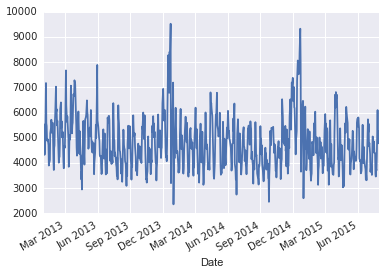

In [26]:
store1_data[ store1_data.Open == 1 ].Sales.plot()

### Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales), and on school holidays the sales are relatively similar.

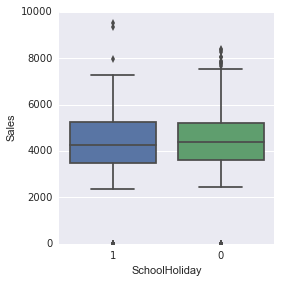

In [27]:
import seaborn as sb
%matplotlib inline


sb.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

> Check: See if there is a difference affecting sales on promotion days.

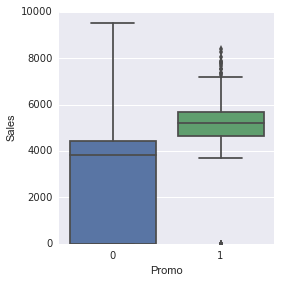

In [30]:
# TODO
sb.factorplot(
    x='Promo',
    y='Sales',
    data=store1_data,
    kind='box', 
)

In [32]:
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,2013,1
2013-01-02,1,3,5530,668,1,0,0,1,2013,1
2013-01-03,1,4,4327,578,1,0,0,1,2013,1
2013-01-04,1,5,4486,619,1,0,0,1,2013,1
2013-01-05,1,6,4997,635,1,0,0,1,2013,1


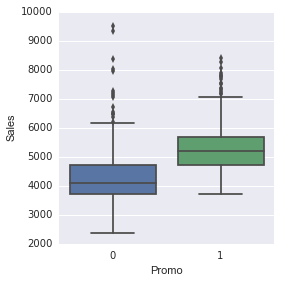

In [31]:
# TODO
sb.factorplot(
    x='Promo',
    y='Sales',
    data=store1_data[ store1_data.Open == 1 ],
    kind='box', 
)

> Check: See if there is a difference affecting sales based on the day of week.

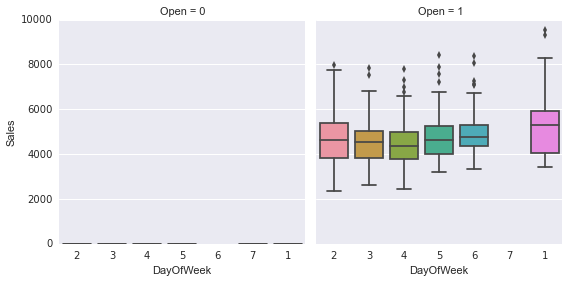

In [33]:
# TODO
sb.factorplot(col='Open',
              x='DayOfWeek',
              y='Sales',
              data=store1_data,
              kind='box')

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

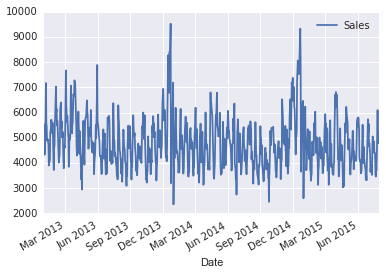

In [36]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

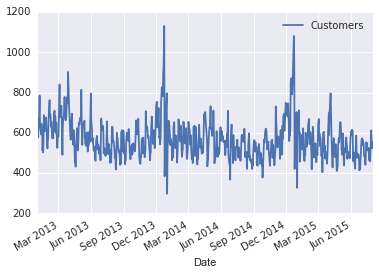

In [37]:
store1_open_data[['Customers']].plot()

In [40]:
store1_open_data['2014-06-05':'201']

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2014-06-05,1,4,5278,585,1,1,0,0,2014,6
2014-06-06,1,5,4957,575,1,1,0,0,2014,6
2014-06-07,1,6,4923,555,1,0,0,0,2014,6
2014-06-10,1,2,4607,560,1,0,0,0,2014,6
2014-06-11,1,3,4207,535,1,0,0,0,2014,6
2014-06-12,1,4,3702,489,1,0,0,0,2014,6
2014-06-13,1,5,3901,498,1,0,0,0,2014,6
2014-06-14,1,6,4757,562,1,0,0,0,2014,6
2014-06-16,1,1,4788,529,1,1,0,0,2014,6


> Check: Use the index filtering to filter to just 2015. Zoom in on changes over time.

> Is it easier to identify the holiday sales bump?

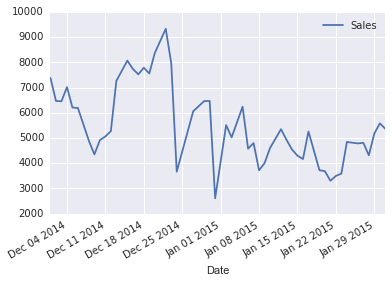

In [44]:
store1_open_data['2014-12':'2015-01'][['Sales']].plot()

In pandas we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

### Data REFINING Using Time Series Statistics

### Autocorrelation

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this we with the `autocorr` function.

`autocorr` takes one argument, the `lag` - which is how many prior data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it, while setting `lag` to 10, computes the correlation between every point and the point 10 days earlier.

In [53]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [57]:
data[['Sales']].resample('D', how='mean')

,Sales
Date,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570
2013-01-06,129.061883
2013-01-07,9710.177578
2013-01-08,7847.028700
2013-01-09,6947.626009


In [58]:
data['Sales'].resample('D', how='mean').autocorr(lag=1)

-0.02585827600638356

In [59]:
data['Sales'].resample('D', how='mean').head()
#data[['Sales']].resample('D', how='mean').head()

Date
2013-01-01      87.284560
2013-01-02    6233.030493
2013-01-03    5693.112108
2013-01-04    5954.218834
2013-01-05    5337.751570
Freq: D, Name: Sales, dtype: float64

> Check: What do the autocorrelation values for Sales and Customers say about shopping habits? Is this true for 1, 5, 10 day autocorrelations?

In [63]:
print data['Customers'].resample('D', how='mean').autocorr(lag=1)
print data['Customers'].resample('D', how='mean').autocorr(lag=2)
print data['Customers'].resample('D', how='mean').autocorr(lag=3)


print data['Sales'].resample('D', how='mean').autocorr(lag=1)
print data['Sales'].resample('D', how='mean').autocorr(lag=5)
print data['Sales'].resample('D', how='mean').autocorr(lag=10)


-0.0951315839098
-0.189215471313
-0.0737077010343
-0.0258582760064
-0.192355899471
-0.0697875468489


### Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the `resample` command, which is very similar to the `groupby` command. It allows us to group over different time intervals.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

In [68]:
data[['Sales']].resample('M', how=['median', 'mean','sum']).head()

Sales                        
            median         mean        sum
Date                                      
2013-01-31  5194.0  5211.555578  180132207
2013-02-28  5421.5  5494.371397  171534275
2013-03-31  5844.0  5820.349168  201180369
2013-04-30  5464.0  5483.749836  183431432
2013-05-31  5585.0  5364.127383  185411063

While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

In [69]:
pd.rolling_mean(data[['Sales']], window=3, center=True, freq='D').head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4004.475720
2013-01-03,5960.120478
2013-01-04,5661.694170
2013-01-05,3807.010762


`rolling_mean` (as well as `rolling_median`) takes these important parameters:
    - the first is the series to aggregate
    - `window` is the number of days to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` is on what level to roll-up the averages to (as used in `resample`). Either `D` for day, `M` for month or `A` for year, etc.

In [78]:
pd.rolling_mean(store1_open_data[['Sales']], window=5, center=True)

,Sales
Date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,5303.2
2013-01-05,5313.2
2013-01-07,5542.0
2013-01-08,5623.2
2013-01-09,5600.0
2013-01-10,5155.2
2013-01-11,4982.6


Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

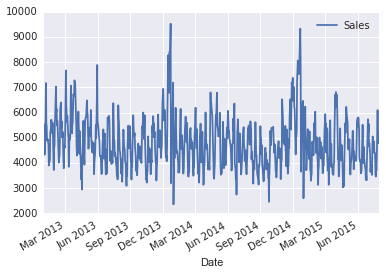

In [80]:
store1_open_data[['Sales']].plot()

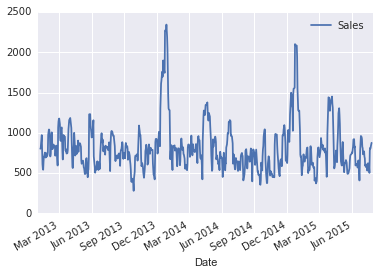

In [91]:
pd.rolling_std(store1_open_data[['Sales']], window=10, center=True).plot()

Example comparing 2015 vs rolling means of 2015

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

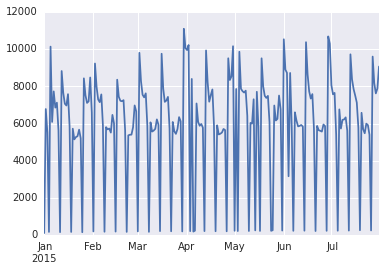

In [87]:
data[['Sales']].resample('d','mean')['2015'].plot()
pd.rolling_mean(data[['Sales']],window=3,center=True,freq='D')['2015'].plot()

> Check: Compare rolling_mean, rolling_median, and ewma using the same windows for store1_data. How do they compare graphically? (EWMA takes in an argument `span`)

In [ ]:
store1_d

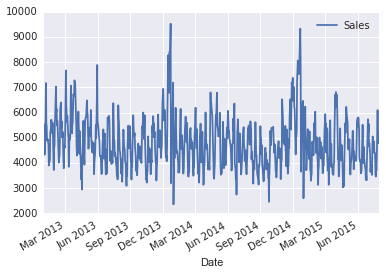

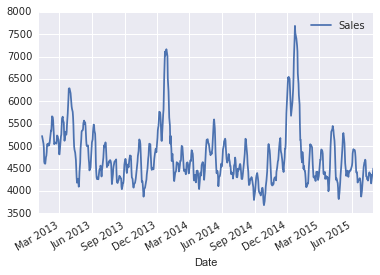

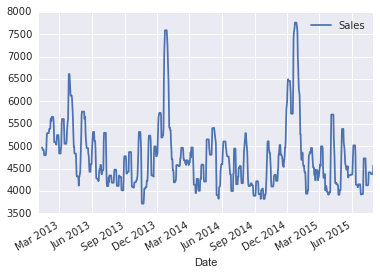

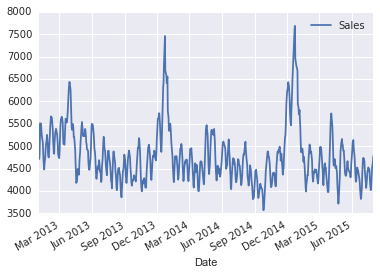

In [98]:
store1_open_data[['Sales']].plot()
pd.rolling_mean( store1_open_data[['Sales']],window=10).plot()
pd.rolling_median( store1_open_data[['Sales']],window=10).plot()
pd.ewma( store1_open_data[['Sales']],span=10).plot()

### Pandas Window functions
Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions are operate on a set of N consecutive rows (a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one argument, `periods`, which is how many prior rows to use for the difference.


In [99]:
store1_open_data.Sales

Date
2013-01-02    5530
2013-01-03    4327
2013-01-04    4486
2013-01-05    4997
2013-01-07    7176
2013-01-08    5580
2013-01-09    5471
2013-01-10    4892
2013-01-11    4881
2013-01-12    4952
2013-01-14    4717
2013-01-15    3900
2013-01-16    4008
2013-01-17    4044
2013-01-18    4127
2013-01-19    5182
2013-01-21    5394
2013-01-22    5720
2013-01-23    5578
2013-01-24    5195
2013-01-25    5586
2013-01-26    5598
2013-01-28    4055
2013-01-29    3725
2013-01-30    4601
2013-01-31    4709
2013-02-01    5633
2013-02-02    5970
2013-02-04    7032
2013-02-05    6049
              ... 
2015-06-27    4019
2015-06-29    5197
2015-06-30    5735
2015-07-01    5223
2015-07-02    5558
2015-07-03    4665
2015-07-04    4797
2015-07-06    4359
2015-07-07    3650
2015-07-08    3797
2015-07-09    3897
2015-07-10    3808
2015-07-11    3530
2015-07-13    5054
2015-07-14    5042
2015-07-15    4767
2015-07-16    4427
2015-07-17    4852
2015-07-18    4406
2015-07-20    4395
2015-07-21    3558
2015-07

In [102]:
store1_open_data[['Sales']].diff(periods=3).head(n=10)

,Sales
Date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,-533
2013-01-07,2849
2013-01-08,1094
2013-01-09,474
2013-01-10,-2284
2013-01-11,-699


### Pandas expanding functions

In addition to the set of `rolling_*` functions, Pandas also provides a similar collection of `expanding_*` functions, which, instead of using a window of N values, use all values up until that time.

In [103]:
# computes the average sales, from the first date _until_ the date specified.
pd.expanding_mean(data['Sales'], freq='d').head()

Date
2013-01-01      87.284560
2013-01-02    3160.157527
2013-01-03    4004.475720
2013-01-04    4491.911499
2013-01-05    4661.079513
Freq: D, Name: Sales, dtype: float64

In [108]:
data[['Sales']].resample('D',how='sum')

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
2013-01-06,143904
2013-01-07,10826848
2013-01-08,8749437
2013-01-09,7746603


In [109]:
pd.expanding_sum( data[['Sales']].resample('D',how='sum'), freq='d').head()

,Sales
Date,
2013-01-01,97235
2013-01-02,7047064
2013-01-03,13394884
2013-01-04,20033838
2013-01-05,25985431


## Exercises

> Plot the distribution of sales by month and compare the effect of promotions

In [117]:
store1_open_data[''].head()

KeyError: '/05'

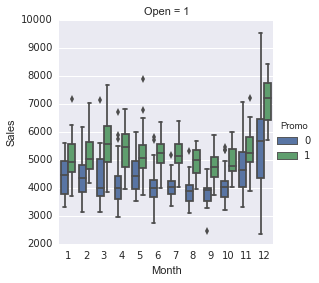

In [125]:
sb.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_open_data, 
    kind='box'
)

> Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

In [28]:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

print('Correlation with last day: {}'.format(average_daily_sales['Sales'].autocorr(lag=1)))
print('Correlation with last month: {}'.format(average_daily_sales['Sales'].autocorr(lag=30)))
print('Correlation with last year: {}'.format(average_daily_sales['Sales'].autocorr(lag=365)))

Correlation with last day: -0.0258582760064
Correlation with last month: -0.129842458225
Correlation with last year: 0.0202385294483


In [145]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


> Plot the 15 day rolling mean of customers in the stores

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

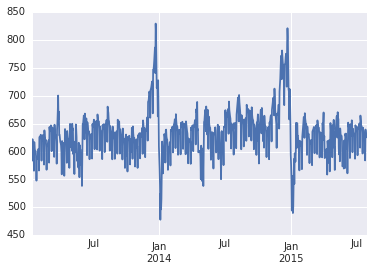

In [150]:
pd.rolling_mean(data[['Customers']], window=15, freq='D').plot()

> Identify the date with largest drop in sales from the same date in the previous month

In [31]:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

average_daily_sales.sort_values(by='DiffVsLastWeek').head()

# Unsurprisingly, this day is Dec. 25 and Dec. 26 in 2014 and 2015. When the store is closed and there are many sales in the preceding week. How, about when the store is open?

average_daily_sales[average_daily_sales.Open == 1].sort_values(by='DiffVsLastWeek').head()

# The top values are Dec. 24 and then 2013-12-09 and 2013-10-14 where on average sales were 4k lower than the same day in the previous week.


,Sales,Open,DiffVsLastWeek
Date,,,
2013-12-24,4693.101345,1,-7014.515695
2014-12-24,4933.386096,1,-5209.272727
2013-12-09,6822.938117,1,-4811.537220
2013-10-14,5893.636771,1,-4027.798206
2015-04-20,5909.294170,1,-4023.443049


> Compute the total sales up until Dec. 2014

In [43]:
total_daily_sales = data[['Sales']].resample('D', how='sum')
pd.expanding_sum(total_daily_sales)['2014-12'].sort_index().head()

# Note that this is **not**
#
#pd.expanding_sum(data['Sales'], freq='D').sort_index()
# since we do not, want to first average over stores.

,Sales
Date,
2014-12-01,4291837359
2014-12-02,4300681181
2014-12-03,4308939200
2014-12-04,4317493242
2014-12-05,4327295098


In [44]:
pd.expanding_sum(data['Sales'], freq='D').head()

Date
2013-01-01       87.284560
2013-01-02     6320.315053
2013-01-03    12013.427161
2013-01-04    17967.645995
2013-01-05    23305.397565
Freq: D, Name: Sales, dtype: float64

> When were the largest differences between 15-day moving/rolling averages?
> HINT: Using `rolling_mean` and `diff`

In [45]:
pd.rolling_mean(data[['Sales']], window=15, freq='D').diff(1).sort_values(by='Sales').head()

# Unsurprisingly, they occur at the beginning of every year after the holiday season.

,Sales
Date,
2014-01-01,-773.446039
2015-01-01,-668.394774
2013-12-31,-663.000538
2014-01-05,-596.739073
2014-05-01,-585.158326


> Plot out the (Store Sales - rolling_avg(Store Sales, 63 day)) / rolling_std( Store Sales, 63 day )

> This plot will give you a rough "change detection" technique that you can use for any variety of applications
> The values can be roughly interpreted as standard deviation moves from a running average

f(x) =   ( x - mean(x) ) / std(x)

In [151]:
s1_sales = store1_open_data[['Sales']]

xx = (s1_sales - pd.rolling_mean(s1_sales,window=63))/ \
pd.rolling_std(s1_sales,window=63)

xx

,Sales
Date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-07,NaN
2013-01-08,NaN
2013-01-09,NaN
2013-01-10,NaN
2013-01-11,NaN


In [154]:
xx[ xx.Sales < -2.0 ]

,Sales
Date,
2013-04-16,-2.088865
2013-04-18,-2.294824
2014-06-26,-2.033303
2014-09-25,-2.488433
2014-12-31,-2.002278
